# Voronoi orbit binning
This testing notebook expects an existing all_models table and will act on its best-fit model.

In [1]:
import dynamite as dyn

import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from vorbin.voronoi_2d_binning import voronoi_2d_binning

print('DYNAMITE version', dyn.__version__)
print('    installed at ', dyn.__path__)  # Uncomment to print the complete DYNAMITE installation path

fname = 'NGC6278_config.yaml'
c = dyn.config_reader.Configuration(fname, reset_logging=True)

[INFO] 18:29:35 - dynamite.config_reader.Configuration - Config file NGC6278_config.yaml read.
[INFO] 18:29:35 - dynamite.config_reader.Configuration - io_settings...
[INFO] 18:29:35 - dynamite.config_reader.Configuration - Output directory tree: NGC6278_output/.
[INFO] 18:29:35 - dynamite.config_reader.Configuration - system_attributes...
[INFO] 18:29:35 - dynamite.config_reader.Configuration - model_components...
[INFO] 18:29:35 - dynamite.config_reader.Configuration - system_parameters...
[INFO] 18:29:35 - dynamite.config_reader.Configuration - orblib_settings...
[INFO] 18:29:35 - dynamite.config_reader.Configuration - weight_solver_settings...
[INFO] 18:29:35 - dynamite.config_reader.Configuration - Will attempt to recover partially run models.
[INFO] 18:29:35 - dynamite.config_reader.Configuration - parameter_space_settings...
[INFO] 18:29:35 - dynamite.config_reader.Configuration - multiprocessing_settings...
[INFO] 18:29:35 - dynamite.config_reader.Configuration - ... using 4 CP

DYNAMITE version 4.2.0
    installed at  ['/Users/maindl/.local/lib/python3.11/site-packages/dynamite']


[INFO] 18:29:35 - dynamite.model.AllModels - Previous models have been found: Reading NGC6278_output/all_models.ecsv into AllModels.table
[INFO] 18:29:35 - dynamite.config_reader.Configuration - Instantiated AllModels object
[INFO] 18:29:35 - dynamite.model.AllModels - No all_models table update required.


In [2]:
# instantiate a Coloring object
coloring = dyn.coloring.Coloring(c)

In [3]:
# define the number of r and lambda_z bins
nr = 6
nl = 7

In [4]:
plotter = dyn.plotter.Plotter(c)

[INFO] 18:29:50 - dynamite.orblib.LegacyOrbitLibrary - Orbit library classification:
[INFO] 18:29:50 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% box
[INFO] 18:29:50 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% x-tubes
[INFO] 18:29:50 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% y-tubes
[INFO] 18:29:50 - dynamite.orblib.LegacyOrbitLibrary -     - 100.0% z-tubes
[INFO] 18:29:50 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% other types
[INFO] 18:29:50 - dynamite.orblib.LegacyOrbitLibrary - Amongst tubes, % with only one nonzero component of L:
[INFO] 18:29:50 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% of x-tubes
[INFO] 18:29:50 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% of y-tubes
[INFO] 18:29:50 - dynamite.orblib.LegacyOrbitLibrary -     - 42.8% of z-tubes
[INFO] 18:29:50 - dynamite.orblib.LegacyOrbitLibrary - Orbit library classification DONE.


[INFO] 18:29:51 - dynamite.weight_solvers.NNLS - Using WeightSolver: NNLS/scipy
[INFO] 18:29:56 - dynamite.weight_solvers.NNLS - NNLS solution read from existing output
[INFO] 18:29:56 - dynamite.plotter.Plotter - Plotting orbit distribution for orbit classes short: 1 subplot(s).
[INFO] 18:29:56 - dynamite.plotter.Plotter - fig_size=3.75.
[INFO] 18:29:56 - dynamite.plotter.Plotter - Plot NGC6278_output/plots/orbit_distribution.png saved in NGC6278_output/plots/
[INFO] 18:29:56 - dynamite.orblib.LegacyOrbitLibrary - Orbit library classification:
[INFO] 18:29:56 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% box
[INFO] 18:29:56 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% x-tubes
[INFO] 18:29:56 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% y-tubes
[INFO] 18:29:56 - dynamite.orblib.LegacyOrbitLibrary -     - 100.0% z-tubes
[INFO] 18:29:56 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% other types
[INFO] 18:29:56 - dynamite.orblib.LegacyOrbitLibrary - Amongst tubes, % with 

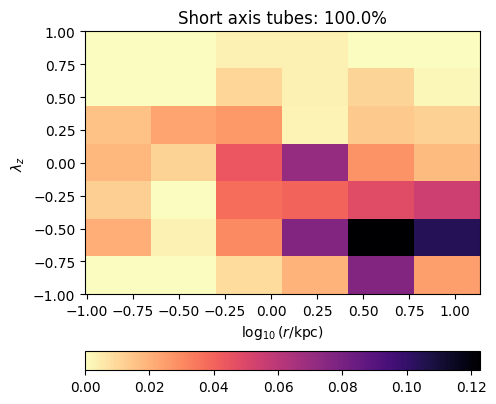

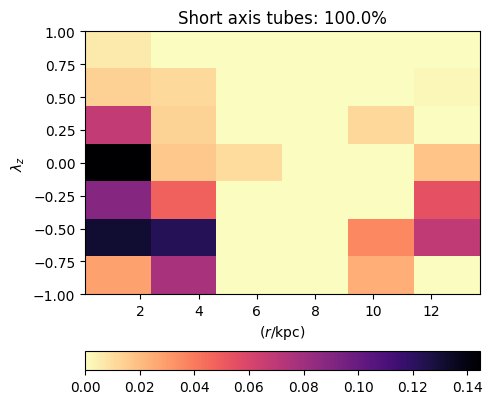

In [5]:
# get an overview of the orbit distribution
# NOTE: when using force_lambda_z=True, then the titles of the orbit-distribution plots are incorrect.
# All orbits are shown in this distribution - not only short-axis tubes!
fig1 = plotter.orbit_distribution(model=None, minr=None, maxr=None, r_scale='log', nr=nr, nl=nl,
                                  orientation='vertical', subset='short', force_lambda_z=True)
fig2 = plotter.orbit_distribution(model=None, minr=None, maxr=None, r_scale='linear', nr=nr, nl=nl,
                                  orientation='vertical', subset='short', force_lambda_z=True)

[INFO] 18:32:46 - dynamite.weight_solvers.NNLS - Using WeightSolver: NNLS/scipy


[INFO] 18:32:50 - dynamite.weight_solvers.NNLS - NNLS solution read from existing output
[INFO] 18:32:50 - dynamite.orblib.LegacyOrbitLibrary - Orbit library classification:
[INFO] 18:32:50 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% box
[INFO] 18:32:50 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% x-tubes
[INFO] 18:32:50 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% y-tubes
[INFO] 18:32:50 - dynamite.orblib.LegacyOrbitLibrary -     - 100.0% z-tubes
[INFO] 18:32:50 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% other types
[INFO] 18:32:50 - dynamite.orblib.LegacyOrbitLibrary - Amongst tubes, % with only one nonzero component of L:
[INFO] 18:32:50 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% of x-tubes
[INFO] 18:32:50 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% of y-tubes
[INFO] 18:32:50 - dynamite.orblib.LegacyOrbitLibrary -     - 42.8% of z-tubes
[INFO] 18:32:50 - dynamite.orblib.LegacyOrbitLibrary - Orbit library classification DONE.
/Users/maindl/.local/l

Bin-accretion...
1  /  10
2  /  10
3  /  10
4  /  10
5  /  10
6  /  10
7  /  10
8  /  10
9  /  10
10  /  10
11  /  10
12  /  10
13  /  10
14  /  10
15  /  10
16  /  10
17  /  10
18  /  10
19  /  10
20  /  10
21  /  10
22  /  10
20  initial bins.
Reassign bad bins...
8  good bins.
Modified Lloyd algorithm...
Iter:    1  Diff: 7.072
Iter:    2  Diff: 3.183
Iter:    3  Diff: 4.677
Iter:    4  Diff: 7.113
Iter:    5  Diff: 1.584
Iter:    6  Diff: 1.584
5  iterations.
Unbinned pixels:  2  /  42
Fractional S/N scatter (%): 116.84525648030781
Elapsed time accretion: 0.01 seconds
Elapsed time optimization: 0.00 seconds


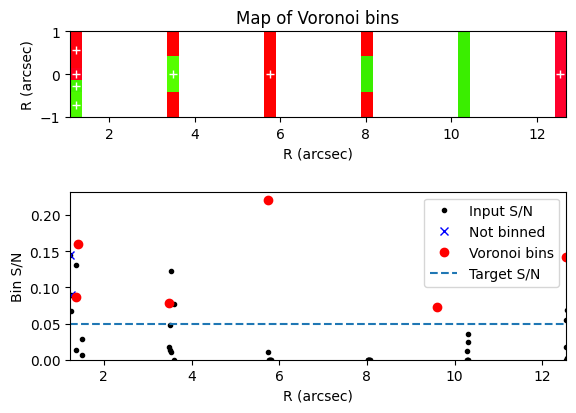

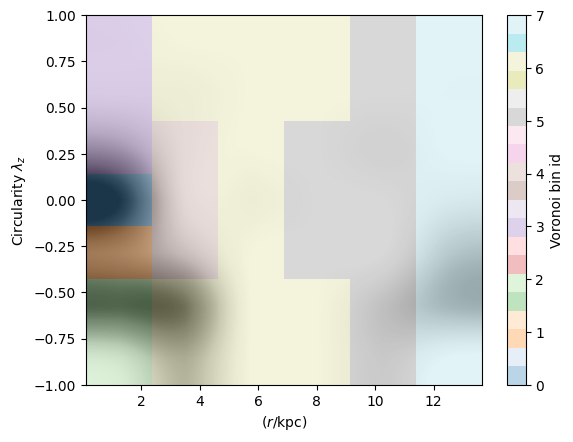

In [6]:
# Perform Voronoi binning of orbits in the radius-circularity phase space. The goal is to group the "original"
# n_orbits orbit bundles into fewer n_bundle "Voronoi" bundles with each of these Voronoi bundles accounting for
# a weight of at least ``vor_weight``.
# The result is a tuple (vor_bundle_mapping, phase_space_binning):
#     vor_bundle_mapping : np.array of shape (n_bundle, n_orbits)
#         Mapping between the "original" orbit bundles and the Voronoi
#         orbit bundles: vor_bundle_mapping(i_bundle, i_orbit) is the
#         fraction of i_orbit assigned to i_bundle, multiplied by i_orbit's weight.
#     phase_space_binning : dict
#         'in': np.array of shape (3, nr*nl), the binning input:
#         bin r, bin lambda_z, bin total weight
#         'out': np.array of shape (3, n_bundle), the Voronoi binning output:
#         weighted Voronoi bin centroid coordinates r_bar, lambda_bar
#         and Voronoi bin total weights
#         'map': np.array of shape (nr*nl,) the phase space mapping:
#         Voronoi bin numbers for each input bin
vor_weight = 0.05  # define the desired (minimum) total orbital weight in each Voronoi bin
vor_bundle_mapping, phase_space_binning = coloring.bin_phase_space(model=None,
                                                                   minr='auto',
                                                                   maxr='auto',
                                                                   r_scale='linear',
                                                                   nr=nr,
                                                                   nl=nl,
                                                                   vor_weight=vor_weight,
                                                                   vor_ignore_zeros=False,
                                                                   make_diagnostic_plots=True,
                                                                   extra_diagnostic_output=True)

In [7]:
# for each input bin: r coordinate, lambda_z coordinate, total weight
print(f'{phase_space_binning["in"].shape=}')
phase_space_binning['in']

phase_space_binning["in"].shape=(3, 42)


array([[ 1.22889311e+00,  3.49134784e+00,  5.75380257e+00,
         8.01625729e+00,  1.02787120e+01,  1.25411667e+01,
         1.22889311e+00,  3.49134784e+00,  5.75380257e+00,
         8.01625729e+00,  1.02787120e+01,  1.25411667e+01,
         1.22889311e+00,  3.49134784e+00,  5.75380257e+00,
         8.01625729e+00,  1.02787120e+01,  1.25411667e+01,
         1.22889311e+00,  3.49134784e+00,  5.75380257e+00,
         8.01625729e+00,  1.02787120e+01,  1.25411667e+01,
         1.22889311e+00,  3.49134784e+00,  5.75380257e+00,
         8.01625729e+00,  1.02787120e+01,  1.25411667e+01,
         1.22889311e+00,  3.49134784e+00,  5.75380257e+00,
         8.01625729e+00,  1.02787120e+01,  1.25411667e+01,
         1.22889311e+00,  3.49134784e+00,  5.75380257e+00,
         8.01625729e+00,  1.02787120e+01,  1.25411667e+01],
       [-8.57142857e-01, -8.57142857e-01, -8.57142857e-01,
        -8.57142857e-01, -8.57142857e-01, -8.57142857e-01,
        -5.71428571e-01, -5.71428571e-01, -5.71428571e-

In [8]:
# for each Voronoi bin: weighted centroid coordinates r_bar, lambda_bar and total weight
print(f'{phase_space_binning["out"].shape=}')
phase_space_binning['out']

phase_space_binning["out"].shape=(3, 8)


array([[ 1.22889311e+00,  1.22889311e+00,  1.22889311e+00,
         1.22889311e+00,  3.49134784e+00,  9.59997560e+00,
         5.75380257e+00,  1.25411667e+01],
       [ 0.00000000e+00, -2.85714286e-01, -7.14285714e-01,
         5.71428571e-01,  3.70074342e-17,  4.44089210e-17,
         5.92118946e-17,  3.17206578e-17],
       [ 1.44602030e-01,  8.91552638e-02,  1.59595334e-01,
         8.72898685e-02,  7.85454655e-02,  7.21876460e-02,
         2.21033684e-01,  1.42241440e-01]])

In [9]:
# phase space mapping: Voronoi bin numbers for each input bin
print(f'{phase_space_binning["map"].shape=}')
phase_space_binning['map']

phase_space_binning["map"].shape=(42,)


array([2, 6, 6, 6, 5, 7, 2, 6, 6, 6, 5, 7, 1, 4, 6, 5, 5, 7, 0, 4, 6, 5,
       5, 7, 3, 4, 6, 5, 5, 7, 3, 6, 6, 6, 5, 7, 3, 6, 6, 6, 5, 7])

In [10]:
# orbit bundle mapping: weighted contribution of each "original" orbit bundle to the Voronoi orbit bundles
print(f'{vor_bundle_mapping.shape=}')

vor_bundle_mapping.shape=(8, 360)


## Testing the orbit binning
As dithering=1, each "original" orbit bundle is just one orbit. Hence, 100% of each such orbit bundle will lie in a unique $r, \lambda_z$ input bin and the `vor_bundle_mapping` will map these "original" orbit bundles to the Voronoi orbit bundles.

To test the orbit binning, we will - for each Voronoi bin (corresponding to one Voronoi orbit bundle each) - identify the connected "original" orbit bundles and add up their weighted fractions. These should be the same whether computed (a) from the binning input data, (b) from the total weights in the Voronoi bins, and (c) from adding all "original" orbit bundles' contributions in the `vor_bundle_mapping`.

In [11]:
for vor_bin in range(phase_space_binning['out'].shape[-1]):
    input_bins = np.where(phase_space_binning['map']==vor_bin)[0]
    print(f'\ninput bins mapped to {vor_bin=}: {input_bins}')
    # orbit weights in input bins:
    weight_in = [phase_space_binning['in'][2][i] for i in input_bins]
    weight_in_total = sum(weight_in)
    print(f'{weight_in=}, {weight_in_total=}')
    vorbin_weight = phase_space_binning['out'][2][vor_bin]
    print(f'{vorbin_weight=}')
    vor_bundle_weight = np.sum(vor_bundle_mapping[vor_bin])
    print(f'{vor_bundle_weight=}')
    print(np.isclose(weight_in_total, vorbin_weight) and np.isclose(weight_in_total, vor_bundle_weight))


input bins mapped to vor_bin=0: [18]
weight_in=[0.14460203045563208], weight_in_total=0.14460203045563208
vorbin_weight=0.14460203045563208
vor_bundle_weight=0.14460203045563208
True

input bins mapped to vor_bin=1: [12]
weight_in=[0.08915526378627064], weight_in_total=0.08915526378627064
vorbin_weight=0.08915526378627064
vor_bundle_weight=0.08915526378627064
True

input bins mapped to vor_bin=2: [0 6]
weight_in=[0.02846088237887845, 0.13113445119593753], weight_in_total=0.15959533357481598
vorbin_weight=0.15959533357481598
vor_bundle_weight=0.159595333574816
True

input bins mapped to vor_bin=3: [24 30 36]
weight_in=[0.06743082511507505, 0.013688102873653298, 0.006170940462997971], weight_in_total=0.08728986845172632
vorbin_weight=0.08728986845172632
vor_bundle_weight=0.08728986845172632
True

input bins mapped to vor_bin=4: [13 19 25]
weight_in=[0.04815866926494969, 0.01689795397635031, 0.013488842233013547], weight_in_total=0.07854546547431354
vorbin_weight=0.07854546547431354
vor_

## Backup

In [13]:
# for tests: get the model, the orblib, and the weights
best_model_idx = c.all_models.get_best_n_models_idx(1)[0]
model = c.all_models.get_model_from_row(best_model_idx)
orblib = model.get_orblib()
_ = model.get_weights(orblib)
weights = model.weights
print(f'Picking best model, {best_model_idx=}.')
if not hasattr(orblib, 'orb_properties'):
    orblib.read_orbit_property_file()
orb_properties = orblib.orb_properties

[INFO] 18:46:14 - dynamite.weight_solvers.NNLS - Using WeightSolver: NNLS/scipy
[INFO] 18:46:17 - dynamite.weight_solvers.NNLS - NNLS solution read from existing output


Picking best model, best_model_idx=12.


In [14]:
# assign minr, maxr
minr = np.min(orb_properties['r']).value
maxr = np.max(orb_properties['r']).value
print(f'{minr=}, {maxr=}')
# get projection tensor
orblib.get_projection_tensor(minr=minr, maxr=maxr, r_scale='linear', nr=nr, nl=nl, force_lambda_z=True)
orbit_fractions = orblib.projection_tensor[2]  # fraction of each "original" orbit bundle in each (r, l) bin

[INFO] 18:46:20 - dynamite.orblib.LegacyOrbitLibrary - Orbit library classification:
[INFO] 18:46:20 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% box
[INFO] 18:46:20 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% x-tubes
[INFO] 18:46:20 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% y-tubes
[INFO] 18:46:20 - dynamite.orblib.LegacyOrbitLibrary -     - 100.0% z-tubes
[INFO] 18:46:20 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% other types
[INFO] 18:46:20 - dynamite.orblib.LegacyOrbitLibrary - Amongst tubes, % with only one nonzero component of L:
[INFO] 18:46:20 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% of x-tubes
[INFO] 18:46:20 - dynamite.orblib.LegacyOrbitLibrary -     - 0.0% of y-tubes
[INFO] 18:46:20 - dynamite.orblib.LegacyOrbitLibrary -     - 42.8% of z-tubes
[INFO] 18:46:20 - dynamite.orblib.LegacyOrbitLibrary - Orbit library classification DONE.


minr=0.09766574505634011, maxr=13.672394113065254
